In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**About dataset**

This dataset was downloaded from kaggle.

Dataset link: https://www.kaggle.com/datasets/elgunisgandarli/btc-and-usdx-price-comparison

**Unfortunately this link is not working anymore.**

**Importing libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

**Reading dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/BTC and USDX price comparison - kaggle/BTC and USDX price comparison.csv')
df = df.drop('usd', axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,open_btc,high_btc,low_btc,close_btc,volume_btc,open_usdx,high_usdx,low_usdx,close_usdx
0,2011-01-03,0.3,0.3,0.3,0.3,1425,79.14,79.53,78.99,79.13
1,2011-01-04,0.3,0.3,0.3,0.3,1879,79.09,79.51,78.89,79.44
2,2011-01-05,0.3,0.3,0.3,0.3,357,79.40,80.35,79.34,80.26
3,2011-01-06,0.3,0.3,0.3,0.3,3456,80.19,80.94,80.15,80.79
4,2011-01-07,0.3,0.3,0.3,0.3,42601,80.87,81.14,80.69,81.01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2953 entries, 0 to 2952
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2953 non-null   datetime64[ns]
 1   open_btc    2953 non-null   float64       
 2   high_btc    2953 non-null   float64       
 3   low_btc     2953 non-null   float64       
 4   close_btc   2953 non-null   float64       
 5   volume_btc  2953 non-null   int64         
 6   open_usdx   2953 non-null   float64       
 7   high_usdx   2953 non-null   float64       
 8   low_usdx    2953 non-null   float64       
 9   close_usdx  2953 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 230.8 KB


**Column reference:**

*   **Date:** Date, range from 2011 to 2022

*   **open_btc:** BTC price from the first transaction of a trading day
*   **high_btc:** Maximum BTC price in a trading day
*   **low_btc:** Minimum BTC price in a trading day
*   **close_btc:** BTC price from the last transaction of a trading day
*   **volume_btc:** Number of units traded in a day for BTC
*   **open_usdx:** USDX Price from the first transaction of a trading day
*   **high_usdx:** Maximum USDX price in a trading day
*   **low_usdx:** Minimum USDX price in a trading day
*   **close_usdx:** Price from the last transaction of a trading day for USDX





**Checking correlation:**

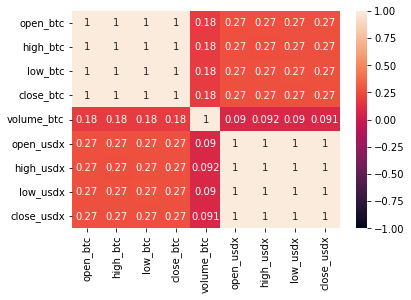

In [ ]:
sns.heatmap(df.drop('Date', axis=1).corr(), vmin = -1, vmax = 1, annot = True)

**Pre visualization:**

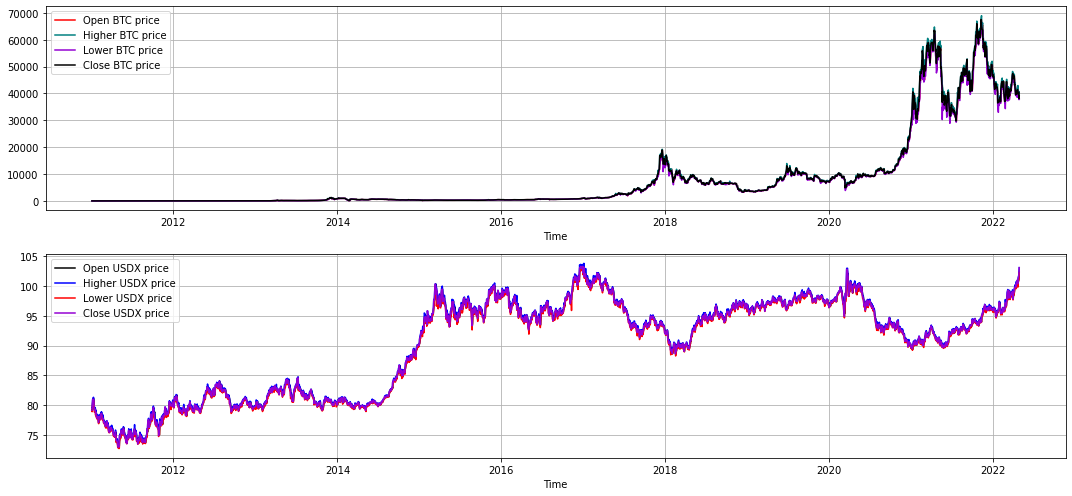

In [10]:
fig1, ax1 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,7))
ax1[0].plot(df['Date'], df['open_btc'], label='Open BTC price', color = 'red')
ax1[0].plot(df['Date'], df['high_btc'], label='Higher BTC price', color = 'teal')
ax1[0].plot(df['Date'], df['low_btc'], label='Lower BTC price', color = 'darkviolet')
ax1[0].plot(df['Date'], df['close_btc'], label='Close BTC price', color = 'black')
ax1[0].set_xlabel('Time')
ax1[0].grid()
ax1[0].legend()

ax1[1].plot(df['Date'], df['open_usdx'], label='Open USDX price', color = 'black')
ax1[1].plot(df['Date'], df['high_usdx'], label='Higher USDX price', color = 'blue')
ax1[1].plot(df['Date'], df['low_usdx'], label='Lower USDX price', color = 'red')
ax1[1].plot(df['Date'], df['close_usdx'], label='Close USDX price', color = 'darkviolet')
ax1[1].set_xlabel('Time')
ax1[1].legend()
ax1[1].grid()

plt.tight_layout()

In [ ]:
fig2 = px.line(df, x='Date', y='volume_btc', labels={'volume_btc': 'BTC - Volume'})
fig2

In [12]:
date_range = (df['Date'] >=  df.loc[0][0]) & (df['Date'] <= '2017-01-01' )
df2 = df.loc[date_range]

From 2011 to 2017: when bitcoin proce was up to U$1200.

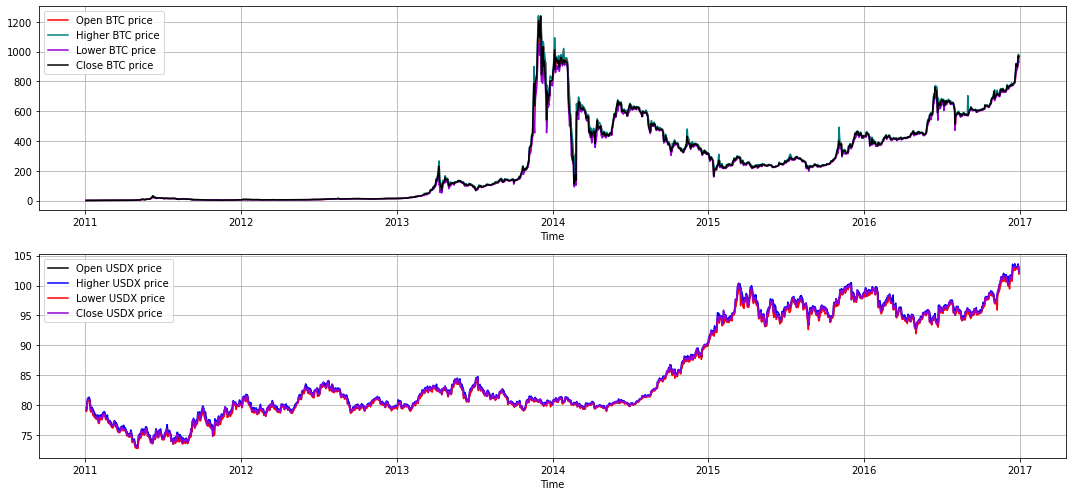

In [15]:
fig3, ax3 = plt.subplots(nrows = 2, ncols = 1, figsize=(15,7))
ax3[0].plot(df2['Date'], df2['open_btc'], label='Open BTC price', color = 'red')
ax3[0].plot(df2['Date'], df2['high_btc'], label='Higher BTC price', color = 'teal')
ax3[0].plot(df2['Date'], df2['low_btc'], label='Lower BTC price', color = 'darkviolet')
ax3[0].plot(df2['Date'], df2['close_btc'], label='Close BTC price', color = 'black')
ax3[0].set_xlabel('Time')
ax3[0].grid()
ax3[0].legend()

ax3[1].plot(df2['Date'], df2['open_usdx'], label='Open USDX price', color = 'black')
ax3[1].plot(df2['Date'], df2['high_usdx'], label='Higher USDX price', color = 'blue')
ax3[1].plot(df2['Date'], df2['low_usdx'], label='Lower USDX price', color = 'red')
ax3[1].plot(df2['Date'], df2['close_usdx'], label='Close USDX price', color = 'darkviolet')
ax3[1].set_xlabel('Time')
ax3[1].legend()
ax3[1].grid()

plt.tight_layout()